### TEAM ZM5

# EDSA MOVIE RECOMMENDATION CHALLENGE 

### Installing packages
Please download all relevant packages in. There is no terminal so you will need to pip install everything.

In [ ]:
#!wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/27685/2229266/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626387714&Signature=KygcspWYq74MDW0sfdmsG%2BKzbIVu7bAXbXSgGzeRSkW1y50gc6YBYMtbWZMOlxFxGTB4M8pHrDatrNrM7K1O7uBHHp6x1h3QEEHSnSa1X4tTYBy%2BiExhUNlV5Ez1E9Df5zYELJM1iOOtpnqWBcsndQN3mGXbpPgN4a9DBmihapuzgRXhixTX8Y3qyY9KJkoi99azSOVvQEj4S57R2KpqKOozaJUNNLSuV9z6KOoE0qzUq3%2FA5vvKE7uN7sG%2B5mmkmqAShUwzuurKBMGlty0%2FCCs8Yalhbfbto2PI4Yr%2BZJgpjxueDILjj1n1zcfeAQ083InWmYWZdd3Jbgyp4fIy0w%3D%3D&response-content-disposition=attachment%3B+filename%3Dedsa-movie-recommendation-challenge.zip'

In [ ]:
#!unzip 'archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626387714&Signature=KygcspWYq74MDW0sfdmsG+KzbIVu7bAXbXSgGzeRSkW1y50gc6YBYMtbWZMOlxFxGTB4M8pHrDatrNrM7K1O7uBHHp6x1h3QEEHSnSa1X4tTYBy+iExhUNlV5Ez1E9Df5zYEL'

In [1]:
!pip install LibRecommender
!pip install surprise
!pip install comet_ml
#!pip install seaborn

     |████████████████████████████████| 457 kB 1.3 MB/s eta 0:00:01
  Created wheel for LibRecommender: filename=LibRecommender-0.6.8-cp37-cp37m-linux_x86_64.whl size=1563554 sha256=5faa4013119d0fa11458ced68f6a7e5dad39e8faa6cb9a4322c3c525f4b45359
  Stored in directory: /root/.cache/pip/wheels/e3/a8/b1/3a17c8c35da0b516ba58f58fb241eeaab0bed17f25d7c87366
Successfully built LibRecommender
     |████████████████████████████████| 275 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 529 kB 5.1 MB/s eta 0:00:01
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=ec0209a94a30a70a37fa1871b58e854229e3f52e0a4ba97e89c69efed8f4d9f5
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


### Imports

In [2]:
import comet_ml

In [3]:
# First import comet_ml at the top of your file
from comet_ml import Experiment

In [4]:
# Create an experiment with your api key for version control
experiment = Experiment(
    api_key="amGQj1TC3Wyk9LYf7bD9xNV6G",
    project_name="movie-reccomender-edsa",
    workspace="daniel-bru",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/daniel-bru/movie-reccomender-edsa/e9574d24ab5c43f6a2555634e7bbf399



In [5]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp
import random

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

from libreco.data import random_split, DatasetPure, DataInfo
from libreco.data import split_by_ratio_chrono, DatasetFeat
from libreco.algorithms import SVD as libSVD
from libreco.algorithms import SVDpp, BPR
from libreco.algorithms import FM, WideDeep, DeepFM, AutoInt, DIN
from libreco.evaluation import evaluate
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_WARNINGS"] = "FALSE"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
def reset_state(name):
    tf.compat.v1.reset_default_graph()
    print("\n", "=" * 30, name, "=" * 30)

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from time import sleep
import gc

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

### Reading in data

In [6]:
root_path = '../input/edsa-movie-recommendation-challenge/'
df_sample_submission = pd.read_csv(root_path + 'sample_submission.csv')
df_movies = pd.read_csv(root_path + 'movies.csv')
df_imdb = pd.read_csv(root_path + 'imdb_data.csv')
df_genome_scores = pd.read_csv(root_path + 'genome_scores.csv')
df_genome_tags = pd.read_csv(root_path +'genome_tags.csv')
train = pd.read_csv(root_path + 'train.csv')
df_test = pd.read_csv(root_path + 'test.csv')
df_tags = pd.read_csv(root_path + 'tags.csv')
df_links = pd.read_csv(root_path + 'links.csv')

In [7]:
pd.set_option("display.max.column", None)
print(df_sample_submission.info())
df_sample_submission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   rating  float64
dtypes: float64(1), object(1)
memory usage: 76.3+ MB
None


,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [8]:
print(df_movies.info())
df_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
print(df_imdb.info())
df_imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
None


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [10]:
print(df_genome_scores.info())
df_genome_scores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
None


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [11]:
print(df_genome_tags.info())
df_genome_tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [12]:
print(df_tags.info())
df_tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB
None


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [13]:
print(df_links.info())
df_links.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
None


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [14]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
None


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [15]:
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB
None


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


# Exploratory Data Analysis

**Most common Genres**

In [16]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


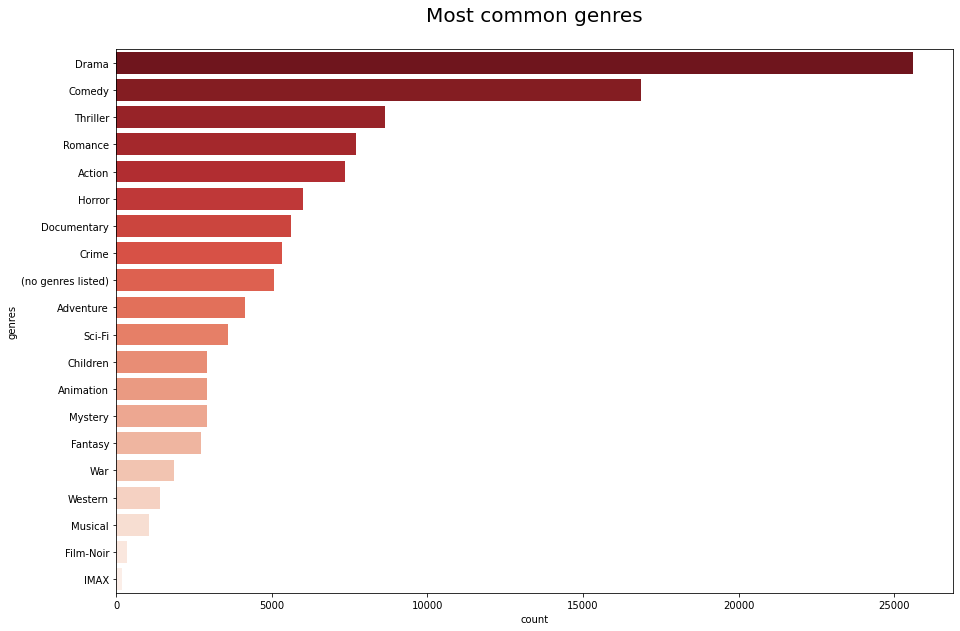

In [17]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

**Most common actors**

In [18]:
# Create dataframe containing only the movieId and cast members
cast = pd.DataFrame(df_imdb[['movieId', 'title_cast']],
                             columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the cast members in each movie
cast.title_cast = cast.title_cast.astype(str).apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie - cast member combination is in a seperate row
cast = pd.DataFrame([(tup.movieId, d) for tup in cast.itertuples() for d in tup.title_cast],
                             columns=['movieId', 'title_cast'])

mostc_cast = cast['title_cast'].value_counts(ascending=False).index.tolist()[:50]

print('Total Cast Members:', len(list(cast['title_cast'].unique())))
print('Most Common Cast Members:\n', mostc_cast)
display(cast.head())

Total Cast Members: 121036
Most Common Cast Members:
 ['nan', 'Samuel L. Jackson', 'Steve Buscemi', 'Keith David', 'Willem Dafoe', 'Robert De Niro', 'Christopher Walken', 'Brian Cox', 'Gérard Depardieu', 'Bruce Willis', 'Danny Glover', 'Morgan Freeman', 'Alec Baldwin', 'Nicolas Cage', 'Peter Stormare', 'Susan Sarandon', 'Richard Jenkins', 'Stanley Tucci', 'Julianne Moore', 'Tom Wilkinson', 'John Goodman', 'Stellan Skarsgård', 'Woody Harrelson', 'Christopher McDonald', 'Val Kilmer', 'Antonio Banderas', 'Jeff Bennett', 'Ed Harris', 'Johnny Depp', 'John Cusack', 'Harvey Keitel', 'Donald Sutherland', 'John Leguizamo', 'Ray Liotta', 'Forest Whitaker', 'Luis Guzmán', 'Paul Giamatti', 'Stephen Tobolowsky', 'Jim Broadbent', 'David Strathairn', 'Richard Riehle', 'George W. Bush', 'John Malkovich', 'Danny Trejo', 'Ewan McGregor', 'William H. Macy', 'Kathy Bates', 'Ving Rhames', 'Robert Downey Jr.', 'Patricia Clarkson']


,movieId,title_cast
0,1,Tom Hanks
1,1,Tim Allen
2,1,Don Rickles
3,1,Jim Varney
4,1,Wallace Shawn


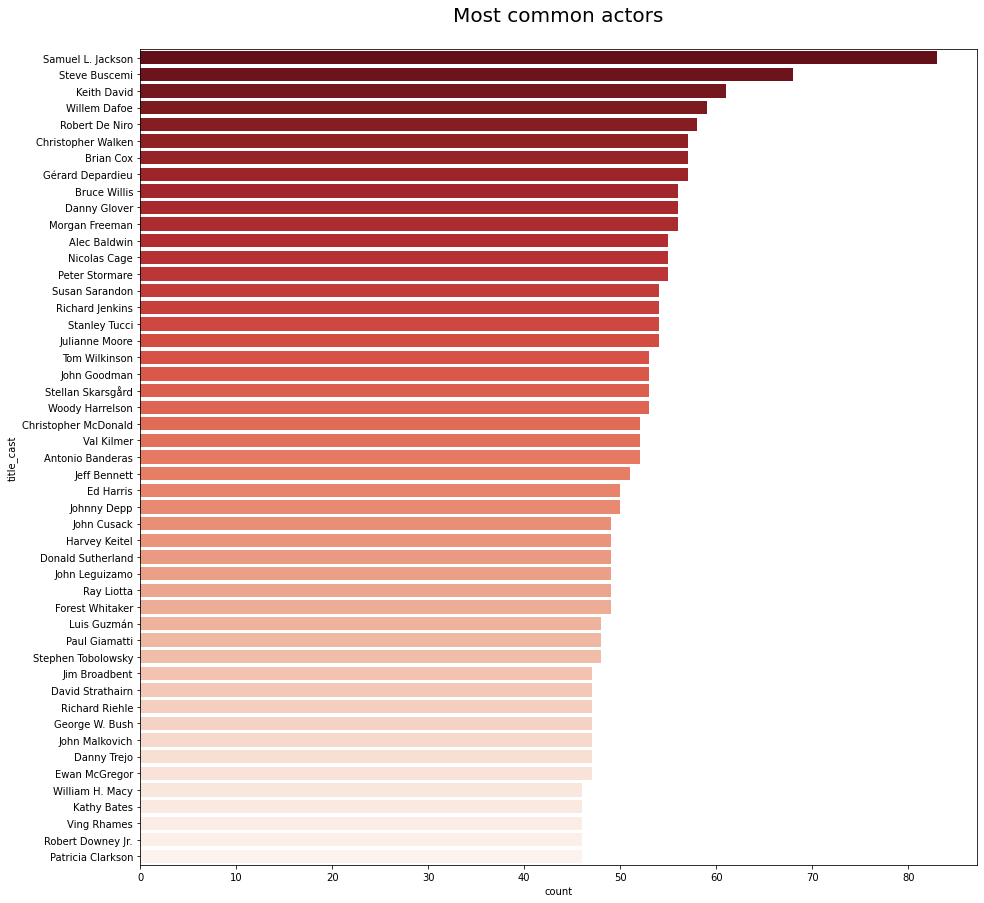

In [19]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 15))
plt.title('Most common actors\n', fontsize=20)
sns.countplot(y="title_cast", data=cast,
              order=mostc_cast[1:50],
              palette='Reds_r')
plt.show()

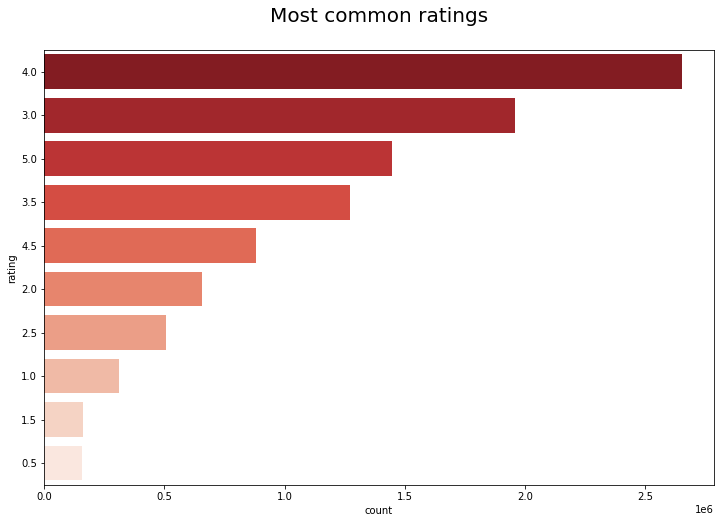

In [20]:
# Plot the genres from most common to least common
ratings = train['rating'].value_counts(ascending=False).index.tolist()[:50]

plot = plt.figure(figsize=(12, 8))
plt.title('Most common ratings\n', fontsize=20)
sns.countplot(y="rating", data=train,
              order=ratings,
              palette='Reds_r')
plt.show()

Here we can see the distribution of the ratings. There seems to be quite a few movies with a prefect rating.
Movies with a perfect rating could be a result of it only being rated by a very small amount of people or even just once.

In [21]:
temp_df = pd.merge(train,df_movies,on='movieId')

In [22]:
# mean of ratings a movie has received 
temp_df.groupby('title')['rating'].mean().head()

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    3.000000
"Great Performances" Cats (1998)                           2.753731
#1 Cheerleader Camp (2010)                                 1.900000
#Female Pleasure (2018)                                    4.000000
#FollowMe (2019)                                           2.400000
Name: rating, dtype: float64

In [23]:
temp_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Which Way Home (2009)               5.0
Kaakha Kaakha (2003)                5.0
Not Quite Human II (1989)           5.0
Selling Isobel (2018)               5.0
Sehar (2005)                        5.0
The Enchanted Sedan Chair (1905)    5.0
K.G.F: Chapter 1 (2018)             5.0
Hard Cash (2002)                    5.0
Everyone's Going to Die (2013)      5.0
Anything for Love (2016)            5.0
Name: rating, dtype: float64

In [24]:
# Movies which have been rated the most
temp_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Shawshank Redemption, The (1994)             32831
Forrest Gump (1994)                          32383
Pulp Fiction (1994)                          31697
Silence of the Lambs, The (1991)             29444
Matrix, The (1999)                           29014
Star Wars: Episode IV - A New Hope (1977)    27560
Jurassic Park (1993)                         25518
Schindler's List (1993)                      24004
Braveheart (1995)                            23722
Fight Club (1999)                            23536
Name: rating, dtype: int64

Finally some movies I have seen.

In [25]:
# creating df for ploting the mean for each movies ratings
rating_mean_count = pd.DataFrame(temp_df.groupby('title')['rating'].mean())
rating_mean_count['rating_count'] = pd.DataFrame(temp_df.groupby('title')['rating'].count())

Text(0.5, 1.0, 'Movies mean rating')

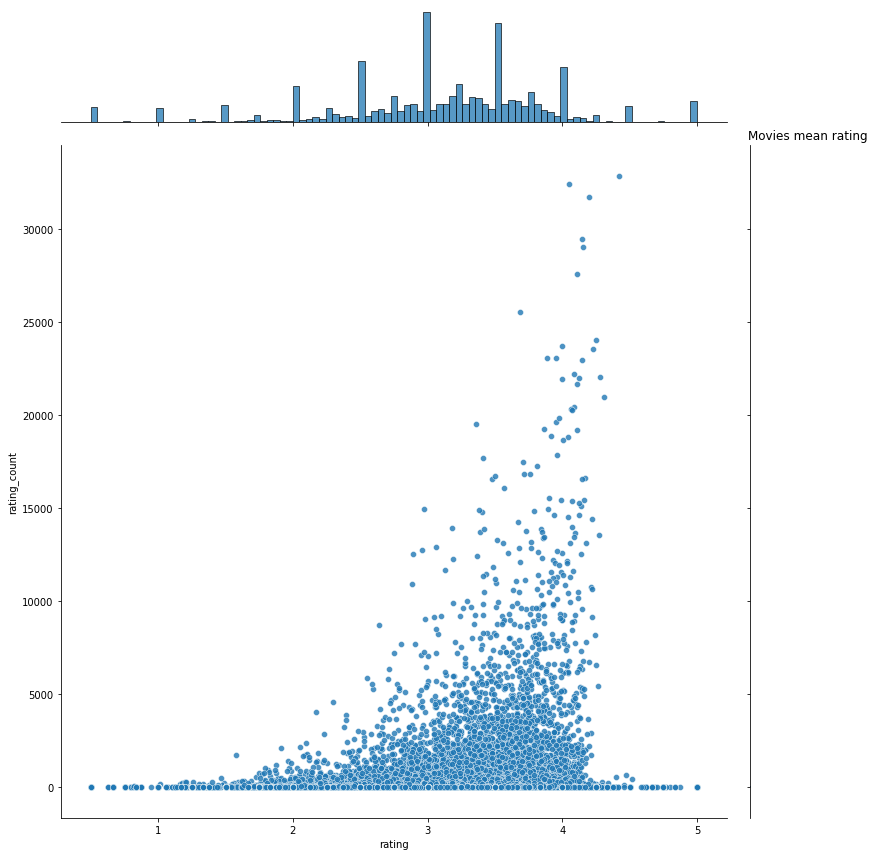

In [26]:
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_count', data=rating_mean_count, alpha=0.8, height=12)
plt.title("Movies mean rating")

In [27]:
# Count number of ratings movie has received
temp_df.groupby('title')['rating'].count().sort_values(ascending=True).head(10)

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    1
Love's Coming (2014)                                       1
Love's Brother (2004)                                      1
Love's Abiding Joy (2006)                                  1
Love on the Dole (1941)                                    1
Love on a Pillow (1962)                                    1
Love on Sunday (2006)                                      1
Love on Ice (2017)                                         1
Love of My Life (2013)                                     1
Love me! (2014)                                            1
Name: rating, dtype: int64

In [28]:
rating_mean_count[rating_mean_count['rating_count']==1].count()

rating          12509
rating_count    12509
dtype: int64

There is quite a few movies in this dataset which have only received one rating are then people niche tastes or are they hidden gems that the masses do not know about.

In [29]:
# count of ratings a user left

temp_df.groupby('userId')['rating'].count().sort_values(ascending=True).head(10)

userId
105714    1
53640     1
127098    1
121071    1
55362     1
79087     1
120862    2
153150    2
113147    2
138028    2
Name: rating, dtype: int64

We can see that some users have only rated a very small amount of movies. We wont be able to to compare these users like or dislikes because there is too little information on them.

In [30]:
# freeing up memory
gc.collect()
del temp_df
del rating_mean_count

# Recomendation Models

* Collaborative Filtering 

### Data Preprocessing

In [31]:
df_train = train.copy()

"""Counting the number of times a movie has recieved an rating"""
rating_count = df_train.groupby('movieId')['rating'].count().reset_index()
rating_count.rename(columns = {'rating': 'movie_rating_count'}, inplace=True)
df_train = df_train.merge(rating_count, on='movieId')

"""Counting the number of times a user has left an rating"""
user_count = df_train.groupby('userId')['rating'].count().reset_index()
user_count.rename(columns={'rating': 'user_rating_count'}, inplace=True)
df_train=df_train.merge(user_count, on='userId')

"""Droping all movies/users which are below a threshhold"""
mrc = 20
urc = 5
df_train = df_train[df_train['movie_rating_count'] > mrc]
df_train = df_train[df_train['user_rating_count'] > urc]
display(df_train.head(3))
print(df_train.shape)
df_train.drop(['movie_rating_count','user_rating_count'], 1, inplace=True)

display(df_train.head(3))
print(df_train.shape)

,userId,movieId,rating,timestamp,movie_rating_count,user_rating_count
0,5163,57669,4.0,1518349992,4253,22
1,5163,2671,1.0,1545511636,5698,22
2,5163,1247,4.5,1434310106,7569,22


(9848791, 6)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,5163,2671,1.0,1545511636
2,5163,1247,4.5,1434310106


(9848791, 4)


In [32]:
def create_features(df, column, features):
    """Creates features from a column of lists where the list items will be the features."""
    
    features_df = pd.DataFrame(columns = features)
    all_features = pd.concat([df, features_df], axis=1)

    for i,row in all_features.iterrows():
        for feature in features:
            if feature in getattr(row,column):
                all_features[feature].iloc[i]= 1
    all_features = all_features.drop(column, axis=1)
    
    return all_features

In [33]:
"""Fill NaN's and extract numbers from budget"""
df_imdb.fillna(0, inplace=True)
df_imdb.budget = df_imdb.budget.astype(str).apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [34]:
%%time
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))
genres = ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)']

genre_encode = create_features(movies_genres, 'genres', genres)
genre_encode.head(4)

CPU times: user 1min 52s, sys: 2.38 s, total: 1min 54s
Wall time: 1min 50s


,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
%%time
cast = pd.DataFrame(df_imdb[['movieId', 'title_cast']],
                             columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the cast members in each movie
cast.title_cast = cast.title_cast.astype(str).apply(lambda x: x.split('|'))
cast_movie = pd.DataFrame([(tup.movieId, d) for tup in cast.itertuples() for d in tup.title_cast],
                             columns=['movieId', 'title_cast'])
mostc_cast = cast_movie['title_cast'].value_counts(ascending=False).index.tolist()[:16]

cast_encode = create_features(cast, 'title_cast', mostc_cast[1:])
cast_encode.head(4)

CPU times: user 7.41 s, sys: 37.6 ms, total: 7.44 s
Wall time: 7.43 s


,movieId,Samuel L. Jackson,Steve Buscemi,Keith David,Willem Dafoe,Robert De Niro,Brian Cox,Gérard Depardieu,Christopher Walken,Bruce Willis,Morgan Freeman,Danny Glover,Alec Baldwin,Peter Stormare,Nicolas Cage,Julianne Moore
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
gc.collect()
del rating_count, user_count, movies_genres, cast, cast_movie
sleep(2)

## Modelling 



### Collaborative Filtering 

In [28]:
%%time
ratings = df_train.copy()
ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}
df = pd.DataFrame(ratings_dict)

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0.5, 5.0))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

CPU times: user 28.3 s, sys: 2.09 s, total: 30.3 s
Wall time: 30.3 s


In [32]:
%%time
trainset, testset = train_test_split(data, test_size=.01, random_state = 1)

CPU times: user 29.3 s, sys: 1.03 s, total: 30.3 s
Wall time: 30.3 s


In [33]:
gc.collect()
del ratings, ratings_dict, df, data
sleep(10)

### Surprise
#### SVD
SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N).

In [ ]:
%%time
algo = SVD(verbose=True)
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Compute RMSE
accuracy.rmse(predictions)
accuracy.mae(predictions)

In [ ]:
gc.collect()
del data

sleep(10)

#### Hyperparameter tuned SVD

In [37]:
%%time
algo = SVD(random_state = 1, n_epochs= 16, verbose=True, n_factors =220, lr_all = 0.016, reg_all =0.02, 
           init_std_dev = 0.005, init_mean = -0.037)
# Train the algorithm on the trainset, and predict ratings for the testset 
algo.fit(trainset)
predictions = algo.test(testset) 

# Compute RMSE
accuracy.rmse(predictions) # RMSE: 0.8028 
accuracy.mae(predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
RMSE: 0.8028
MAE:  0.6050
CPU times: user 26min 4s, sys: 223 ms, total: 26min 4s
Wall time: 26min 4s


0.6050337130095826

In [ ]:
gc.collect()
del algo, trainset, testset, 
sleep(10)

In [ ]:
trainset = data.build_full_trainset()
algo = SVD(random_state = 1, n_epochs= 16, verbose=True, n_factors =220, lr_all = 0.016, reg_all =0.02, init_std_dev = 0.005, init_mean = -0.037)
algo.fit(trainset)

### LibRecommender

In [37]:
%%time
data = train.copy()
data.rename(columns={'userId':'user', 'movieId':'item','rating':'label', 
                               'timestamp':'time'}, inplace=True)

# split whole data into three folds for training, evaluating and testing
train_data, eval_data, test_data = random_split(data, multi_ratios=[0.99, 0.005, 0.005])

# building data sets
train_data, data_info = DatasetPure.build_trainset(train_data)
eval_data = DatasetPure.build_evalset(eval_data)
test_data = DatasetPure.build_testset(test_data)
print(data_info)

n_users: 162541, n_items: 48104, data sparsity: 0.1266 %
CPU times: user 31 s, sys: 3.14 s, total: 34.2 s
Wall time: 34.1 s


In [38]:
def reset_state(name):
    tf.compat.v1.reset_default_graph()
    print("\n", "=" * 30, name, "=" * 30)

#### SVD

In [39]:
%%time
reset_state('libSVD')
svd_lib = libSVD(task="rating", data_info=data_info, embed_size=8, n_epochs=3, lr=0.005, batch_size=10000, 
                 batch_sampling=True)  # embed_size=8, n_epochs=3, lr=0.005,batch_size=10000
# monitor metrics on eval_data during training
svd_lib.fit(train_data, verbose=2, eval_data=eval_data, metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
print("evaluate_result: ", evaluate(model=svd_lib, data=test_data,
                                    metrics=["rmse", "mae"]))


 ============================== libSVD ==============================
Training start time: 2021-07-15 21:25:34


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 336.90it/s]


Epoch 1 elapsed: 17.641s
	 train_loss: 0.7952
	 eval rmse: 0.8404
	 eval mae: 0.6380
	 eval r2: 0.3741


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 399.97it/s]


Epoch 2 elapsed: 17.439s
	 train_loss: 0.6492
	 eval rmse: 0.8225
	 eval mae: 0.6236
	 eval r2: 0.4005


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 405.89it/s]


Epoch 3 elapsed: 17.686s
	 train_loss: 0.599
	 eval rmse: 0.8214
	 eval mae: 0.6213
	 eval r2: 0.4020


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 396.48it/s]

evaluate_result:  {'rmse': 0.8151601997993262, 'mae': 0.6182460654764502}
CPU times: user 1min 47s, sys: 7.85 s, total: 1min 55s
Wall time: 54 s


In [61]:
print("prediction: ", svd_lib.predict(user=5163, item=57669))
print("recommendation: ", svd_lib.recommend_user(user=5163, n_rec=5))

prediction:  [4.103308]
recommendation:  [(27033, 4.9627094), (143377, 4.9391913), (101964, 4.9210563), (138835, 4.9126706), (146327, 4.899407)]


In [41]:
gc.collect()
del data, svd_lib
sleep(10)

#### SVDpp

In [ ]:
%%time
reset_state('SVDpp')
svdpp = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2, lr=0.0048,batch_size=10000,
              batch_sampling=True)  # embed_size=16, n_epochs=2, lr=0.005,batch_size=10000
# monitor metrics on eval_data during training
svdpp.fit(train_data, verbose=2, eval_data=eval_data, metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
print("evaluate_result: ", evaluate(model=svdpp, data=test_data,
                                    metrics=["rmse", "mae"]))

In [ ]:
print("prediction: ", svdpp.predict(user=5163, item=57669))
print("recommendation: ", svdpp.recommend_user(user=5163, n_rec=5))
svdpp.predict(df_train['userId'][:10], df_train['movieId'][:10])

In [ ]:
gc.collect()
del svdpp, train_data, data_info, eval_data, test_data
sleep(10)

Train SVDpp on full dataset

In [ ]:
# train_data, data_info = DatasetPure.build_trainset(data)

# reset_state('SVDpp')
# svdpp = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2, lr=0.0048,batch_size=10000, batch_sampling=True)
# svdpp.fit(train_data, verbose=2)

Save SVDpp model

In [ ]:
"""
data_info.save(path="SVDpp_model_path")
svdpp.save(path="SVDpp_model_path", model_name="svdpp_model", manual=True,
                inference_only=False)
"""

In [ ]:
"""
tf.compat.v1.reset_default_graph()
data_info = DataInfo.load("SVDpp_model_path")

svdpp_loaded = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2, 
                                                lr=0.005,batch_size=10000, batch_sampling=True)

data = pd.read_csv(root_path + 'train.csv', header=0, names = ["user", "item", "label", "time"])
train_data, eval_data, test_data = random_split(data, multi_ratios=[0.99, 0.005, 0.005])
train_data, data_info = DatasetPure.build_trainset(train_data)
svdpp_loaded.rebuild_graph(path="SVDpp_model_path", model_name="svdpp_model",
                        full_assign=True, train_data=train_data)
"""

In [ ]:
#svdpp_loaded.predict(df_train['userId'][:10], df_train['movieId'][:10])

### Hybrid Models

In [ ]:
%%time

""" Creating more features from genre and cast"""

mergeded_train = df_train.copy()
mergeded_train = pd.merge(mergeded_train, genre_encode,on= 'movieId', how='left')
mergeded_train = pd.merge(mergeded_train, cast_encode, on= 'movieId', how='left')

In [ ]:
gc.collect()
del genre_encode, cast_encode
sleep(10)

In [ ]:
%%time
mergeded_train = pd.merge(mergeded_train, df_imdb[['movieId', 'runtime', 
                                                   'budget']], on= 'movieId').fillna(0)
display(mergeded_train.head())
print(mergeded_train.shape)

In [ ]:
columns = list(mergeded_train.columns)
print(columns[4:])

In [ ]:
mergeded_train.to_csv('train_feat.csv', index=False)

In [ ]:
from IPython.display import FileLink
FileLink('./train_feat.csv')

In [ ]:
%%time
#mergeded_train = pd.read_csv('./train_feat.csv')
mergeded_train.rename(columns={'userId':'user', 'movieId':'item','rating':'label', 
                               'timestamp':'time'}, inplace=True)

columns = list(mergeded_train.columns)
# We have to specify which columns are the content based features
sparse_col = columns[4:]
item_col = columns[4:]

# split whole data into three folds for training, evaluating and testing
train_data, eval_data, test_data = random_split(
    mergeded_train, multi_ratios=[0.99, 0.005, 0.005])


train_data, data_info = DatasetFeat.build_trainset(train_data, item_col=item_col,
                                                   sparse_col=sparse_col)
eval_data = DatasetFeat.build_evalset(eval_data)
test_data = DatasetFeat.build_testset(test_data)
print(data_info)

In [ ]:
gc.collect()
del mergeded_train, columns, sparse_col, item_col
sleep(10)

### FM

Factorization Machines (FM) which are a new model class that combines the advantages of Support Vector Machines (SVM) with factorization models. Like SVMs, FMs are a general predictor working with any real valued feature vector.

In [ ]:
%%time
reset_state("FM")
fm = FM("rating", data_info, embed_size=16, n_epochs=4,
            lr=0.005, lr_decay=True, reg=None, batch_size=10000,
            num_neg=1, use_bn=True, dropout_rate=None, tf_sess_config=None)
fm.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
           metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
print("evaluate_result: ", evaluate(model=fm, data=test_data,
                                    metrics=["rmse", "mae"]))

In [ ]:
gc.collect()
del fm
sleep(10)

### WD

Wide and Deep Learning Model is a ML/ DL model that has two main components: Memorizing component (Linear model) and a Generalizing component (Neural Network) and a cross product of the previous two components. Wide and Deep Learning Model is used in recommendation systems.

In [ ]:
%%time
reset_state("Wide_Deep")
wd = WideDeep("rating", data_info, embed_size=16, n_epochs=2,
              lr={"wide": 0.005, "deep": 1e-4}, lr_decay=False, reg=None,
              batch_size=10000, num_neg=1, use_bn=False, dropout_rate=None,
              hidden_units="128,64,32", tf_sess_config=None)
wd.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
       metrics=["rmse", "mae", "r2"])
# do final evaluation on test data
print("evaluate_result: ", evaluate(model=wd, data=test_data,
                                    metrics=["rmse", "mae"]))

In [ ]:
gc.collect()
del wd
sleep(10)

### Deep FM

DeepFM: A Factorization-Machine based Neural Network for CTR Prediction. The proposed model, DeepFM, combines the power of factorization machines for recommendation and deep learning for feature learning in a new neural network architecture

In [ ]:
%%time
reset_state("DeepFM")
deepfm = DeepFM("rating", data_info, embed_size=16, n_epochs=3,
                lr=5e-3, lr_decay=True, reg=None, batch_size=2048,
                num_neg=1, use_bn=False, dropout_rate=None,
                hidden_units="128,64,32,16,8,4", tf_sess_config=None)
deepfm.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
           metrics=["rmse", "mae", "r2"])

print("evaluate_result: ", evaluate(model=deepfm, data=test_data,
                                    metrics=["rmse", "mae"]))

In [ ]:
gc.collect()
del deepfm
sleep(10)

### AutoInt

AutoInt: Automatic Feature Interaction Learning via Self-Attentive Neural Networks. ... With different layers of the multi-head self-attentive neural networks, different orders of feature combinations of input features can be modeled. The whole model can be efficiently fit on large-scale raw data in an end-to-end fashion.

In [ ]:
%%time
reset_state("AutoInt")
autoint = AutoInt("rating", data_info, embed_size=16, n_epochs=2,
                  att_embed_size=(8, 8, 8), num_heads=4, use_residual=False,
                  lr=0.005, lr_decay=True, reg=None, batch_size=2048,
                  num_neg=1, use_bn=False, dropout_rate=None,
                  hidden_units="128,64,32", tf_sess_config=None)
autoint.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
            metrics=["rmse", "mae", "r2"])

In [ ]:
gc.collect()
del autoint
sleep(10)

# The Recommender Engine 

Now that we have trained, tested and validated a few recommendation models, we can now go ahead and build a recommender engine. 
### A model-based Reccomender Engine
to be precise. 

The Reccomender Engine will take in a list of movies the user likes and will return a list of movie reccomendations based on the provided list.

In [43]:
%%time
data = train.copy()
data.rename(columns={'userId':'user', 'movieId':'item','rating':'label', 
                               'timestamp':'time'}, inplace=True)
train_data, data_info = DatasetPure.build_trainset(data)

reset_state('libSVD')
svd_lib = libSVD(task="rating", data_info=data_info, embed_size=8, n_epochs=3, lr=0.005, batch_size=10000, 
                 batch_sampling=True)
svd_lib.fit(train_data, verbose=2)


 ============================== libSVD ==============================
Training start time: 2021-07-15 21:45:40


train: 100%|██████████| 1001/1001 [00:09<00:00, 104.39it/s]


Epoch 1 elapsed: 17.585s
	 train_loss: 0.7967


train: 100%|██████████| 1001/1001 [00:09<00:00, 100.72it/s]


Epoch 2 elapsed: 17.704s
	 train_loss: 0.6477


train: 100%|██████████| 1001/1001 [00:09<00:00, 103.63it/s]


Epoch 3 elapsed: 17.496s
	 train_loss: 0.5971
CPU times: user 2min 13s, sys: 9.98 s, total: 2min 23s
Wall time: 1min 21s


In [110]:
ratings_df = train.copy()
ratings_df.drop(['timestamp'], axis=1,inplace=True)

def prediction_item(item_id):
    """Map a given favourite movie to users within the
       MovieLens dataset with the same preference.

    Parameters
    ----------
    item_id : int
        A MovieLens Movie ID.

    Returns
    -------
    list
        User IDs of users with similar high ratings for the given movie.

    """
    # Using Surprise Model
    if str(model)[1:8] != 'libreco':
        # Data preprosessing
        reader = Reader(rating_scale=(0.5, 5))
        load_df = Dataset.load_from_df(ratings_df,reader)
        a_train = load_df.build_full_trainset()

        predictions = []
        for ui in a_train.all_users():
            predictions.append(model.predict(iid=item_id,uid=ui, verbose = False))
    
    # Using LibReco Model
    else: 
        pred = list(svd_lib.predict(user=train['userId'].unique(), item=item_id))
        users = list(train['userId'])
        predictions = [(i, j) for i, j in zip(pred, users)] 
             
    return predictions

def pred_movies(movie_list):
    """Maps the given favourite movies selected within the app to corresponding
    users within the MovieLens dataset.

    Parameters
    ----------
    movie_list : list
        Three favourite movies selected by the app user.

    Returns
    -------
    list
        User-ID's of users with similar high ratings for each movie.

    """
    # Store the id of users
    id_store=[]
    # For each movie selected by a user of the app,
    # predict a corresponding user within the dataset with the highest rating
    
    # Using Surprise Model
    if str(model)[1:8] != 'libreco':
        for i in movie_list:
            movieID = df_movies[df_movies['title']==i]['movieId'].values[0]
            predictions = prediction_item(item_id = movieID)
            predictions.sort(key=lambda x: x.est, reverse=True)
            # Take the top 10 user id's from each movie with highest rankings
            for pred in predictions[:10]:
                id_store.append(pred.uid)
                
    # Using LibReco Model
    else:          
        for i in movie_list:
            movieID = df_movies[df_movies['title']==i]['movieId'].values[0]   
            predictions = prediction_item(item_id = movieID)
            predictions.sort(reverse=True)
            # Take the top 10 user id's from each movie with highest rankings
            for i, j in predictions[:10]:
                id_store.append(j)       
        
    # Return a list of user id's
    return id_store

def recommend_movies(movie_list,top_n=10):
    """Performs Collaborative filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """

    indices = pd.Series(df_movies['title'])
    user_ids = pred_movies(movie_list)

    # Create Dataframe of users with similar high ratings for each movie
    df_init_users = ratings_df[ratings_df['userId']==user_ids[0]]
    for i in user_ids[1:]:
        df_init_users=df_init_users.append(ratings_df[ratings_df['userId']==i])

    df_init_users = df_init_users.merge(df_movies[['movieId','title']], on='movieId')

    # Get the top rated movies
    sorted_movies = df_init_users.groupby('title').mean().sort_values(by='rating', ascending=False)

    no_movies = sorted_movies[sorted_movies['rating']==5].shape[0]

    good_movies = sorted_movies.index[:no_movies].to_list()

    # Sample from the top n movies and recommend 
    recommended_movies = random.sample(good_movies, top_n)

    return recommended_movies

In [111]:
movie_list = ['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)']
model = svd_lib
recommend_movies(movie_list)

['Wallace & Gromit: A Close Shave (1995)',
 'Tree of Life, The (2011)',
 'Ikiru (1952)',
 'Dancer in the Dark (2000)',
 'Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)',
 'D3: The Mighty Ducks (1996)',
 'City of Men (Cidade dos Homens) (2007)',
 'Rashomon (Rashômon) (1950)',
 'Winter Light (Nattvardsgästerna) (1963)',
 'Fireworks (1947)']


### Create Submission
Hit the blue Publish button at the top of your notebook screen. It will take some time for your kernel to run. When it has finished your navigation bar at the top of the screen will have a tab for Output. This only shows up if you have written an output file (like we did in the Prepare Submission File step).

In [ ]:
# Pickle The Model
model_save_path = "SVD_tunedAA1.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(algo,file)

In [ ]:
from IPython.display import FileLink
FileLink('./SVD_tunedAA1.pkl')

In [ ]:
"""
model_load_path = "/content/drive/MyDrive/Unsupervised Models/SVD_tunedA1.pkl"
with open(model_load_path,'rb') as file:
    algo = pickle.load(file)
"""

In [ ]:
def create_submission(algo, save_name):
    
    ratings_predictions = [algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
    df_pred = pd.DataFrame(ratings_predictions)
    df_pred = df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
    df_pred.drop(['r_ui','details'],axis=1,inplace=True)
    # Create ID column
    df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv(save_name + '.csv', index=False)
    
    return pd.read_csv('./' + save_name + '.csv')

def create_librec_submission(svdpp, save_name):
    svdpp_pred = svdpp.predict(df_test['userId'], df_test['movieId'], cold_start= "popular")
    df_pred =df_test.copy()
    df_pred['rating'] = svdpp_pred
    df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv(save_name + '.csv', index=False)
    return pd.read_csv('./' + save_name + '.csv')

In [ ]:
%%time
submission = create_submission(algo, 'SVD_tunedA2')
submission.head(10)

In [ ]:
%%time
librec_submission = create_librec_submission(svd_lib, 'SVD_librecA2')
librec_submission.head(10)

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

In [ ]:
#!wget 'https://nek225hf93.clg07azjl.paperspacegradient.com/files/train_feat.csv'

In [ ]:
#cp "/content/train_feat.csv" "/content/drive/MyDrive/Unsupervised Models"

In [ ]:
def load_movie_titles(df):
    """Load movie titles from database records.
    Parameters
    ----------
    path_to_movies : str
        Relative or absolute path to movie database stored
        in .csv format.
    Returns
    -------
    list[str]
        Movie titles.
    """
    df = df.dropna()
    movie_list = df['title'].to_list()
    return movie_list

title_list = load_movie_titles(df_movies)
print(len(df_movies[14930:15200]))
print(len(df_movies[25055:25255]))
print(len(df_movies[21100:21200]))